# Testing the subcubes of the 30 Dor fields

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube

In [2]:
sns.set_context("talk")

Load the subcube containing Hα

In [3]:
cubeC = Cube("../big-data/lmc-30dor-C-subcube-62-71.fits")

Plot the average spectrum of the entire field, together with the expected wavelengths of the Raman scattered O I and Si II lines.  I am assuming a systemic velocity of +265 km/s, which comes from the Hα and [N II] lines, although it might be slightly different for neutral lines. 

[(700.0, 900.0)]

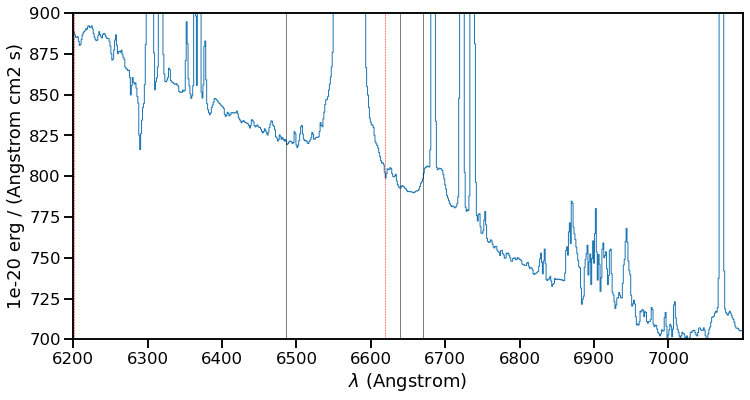

In [12]:
Vsys = 265.0
light_speed = 3e5

fig, ax = plt.subplots(figsize=(12, 6))
cubeC.mean(axis=(1, 2)).plot()
for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in 6196.0, 6613.5,:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed")
ax.set(
    ylim=[700, 900],
)

So, we can maybe just about see the Raman wings but they are quite weak in the average spectrum.  There are possible indications of the Raman absorption lines, but there is a lot of other stuff that gets in the way.  There is a very pronounced absorption at a rest wavelength of 6613.5 Å, which is probably the 6614 DIB feature. It is usually accompanied by another feature at 6196 Å, but that just misses this spectral window. 

- [ ] *We need to check the correlation of its EW with C(Hβ) to see if it is really a DIB*

Alternatively, it **could** be a Raman-scattered feature.  We need to work out what its UV wavelength would be.

In [15]:
# convert to vacuum 
wav2 = 6613.5 * 6635.17 / 6633.338
wav1 = 1 / (1/wav2 + 1/1025.72220 - 1/6564.553)
wav1

1026.9537767742042

I have looked AtLL and it turns out there is an S I line at 1026.95 Å, and also a Be II line:

```
-LAB-WAVL-ANG-VAC-|-SPC--|TT|----------CONFIGURATION----------|-TERM--|-J_i-J_k-|--A_ki--|-TPF-|--LEVEL-ENERGY--EV--|-REF---|
   1026.95          S I]  E1          3s2.3p4-3s2.3p3.(2Po).9d  1D-3Po   2 - 1                  1.145441 - 13.218400 ASD
   1026.95          S I]  E1          3s2.3p4-3s2.3p3.(2Po).9d  1D-3Po   2 - 2                  1.145441 - 13.218400 ASD
   1026.9586        Be II E1           1s2.2p-1s2.5d           2Po-2D  3/2 - 5/2 1.76e+08     3 3.959477 - 16.032426 010
   1026.9599        Be II E1           1s2.2p-1s2.5d           2Po-2D  3/2 - 3/2 2.94e+07     3 3.959477 - 16.032411 010
```

Both look very unlikely candidates. Be II because of negligible abundance and lower level is at 4 eV.  S I because S$^+$ should be dominant ionization stage, but maybe there could be enough column of S$^0$ in the PDR.  But lower level is at 1.14 eV, so would require very high densities (how high?) and temperature of at least 5000 K to populate.  And there is no $A$ value given, but it is likely to be small since it is semi-forbidden.  


The 6664 feature is broad emission wings on the He I 6678 line. Is this from WR stars?

## Fit and remove continuum



## Quick and dirty extraction of some lines

In [16]:
hacont_blue = cubeC.select_lambda(6490, 6500).mean(axis=0)

In [17]:
hacont_red = cubeC.select_lambda(6640, 6650).mean(axis=0)

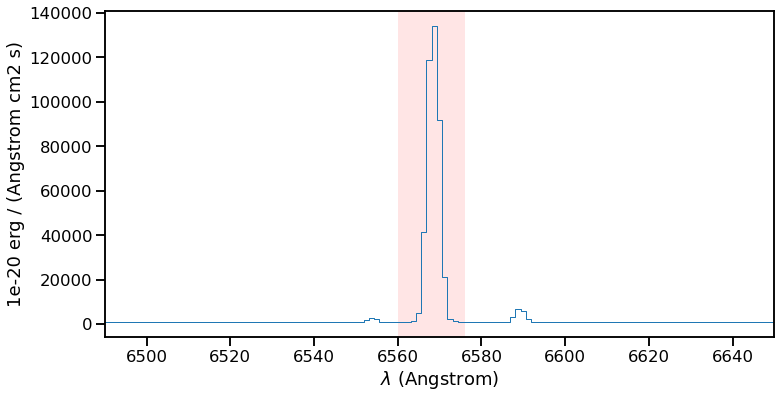

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC.select_lambda(6490, 6650).mean(axis=(1, 2)).plot()
ax.axvspan(6560, 6576, linewidth=0, color="r", alpha=0.1);

In [53]:
#hamapC = (cubeC.select_lambda(6560, 6576) - 0.5*(hacont_blue + hacont_red)).sum(axis=0)
hacont = 0.5 * (hacont_blue + hacont_red)
hamapC = cubeC.select_lambda(6567, 6569).sum(axis=0)

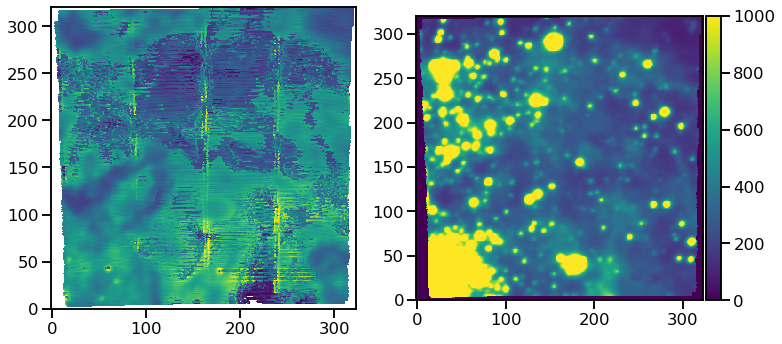

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
hamapC.plot(ax=axes[0], vmin=0, vmax=6e5)
hacont.plot(ax=axes[1], colorbar="v", vmin=0, vmax=1e3)

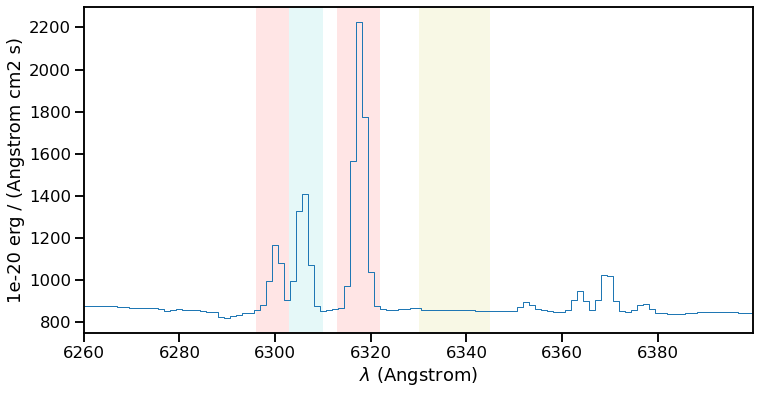

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC.select_lambda(6260, 6400).mean(axis=(1, 2)).plot()
ax.axvspan(6296, 6303, linewidth=0, color="r", alpha=0.1)
ax.axvspan(6303, 6310, linewidth=0, color="c", alpha=0.1)
ax.axvspan(6313, 6322, linewidth=0, color="r", alpha=0.1)
ax.axvspan(6330, 6345, linewidth=0, color="y", alpha=0.1);

In [46]:
cont6340 = cubeC.select_lambda(6330, 6345).mean(axis=0)
oi6300map = (cubeC.select_lambda(6303, 6310) - cont6340).sum(axis=0)

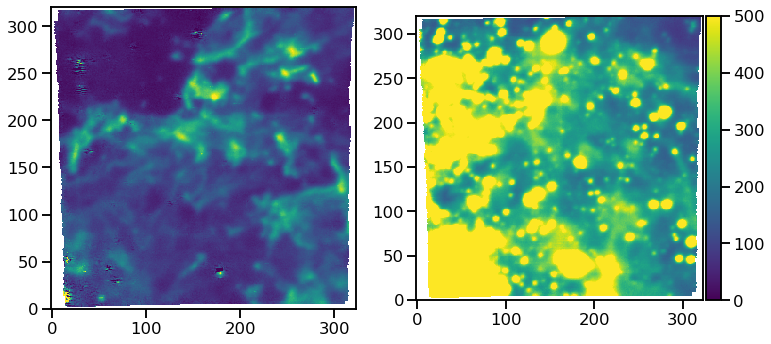

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
oi6300map.plot(ax=axes[0], vmin=0, vmax=6e3)
cont6340.plot(ax=axes[1], colorbar="v", vmin=0, vmax=5e2)

In [60]:
xx6293map = (cubeC.select_lambda(6296, 6303) - cont6340).sum(axis=0)
siii6312map = (cubeC.select_lambda(6313, 6322) - cont6340).sum(axis=0)

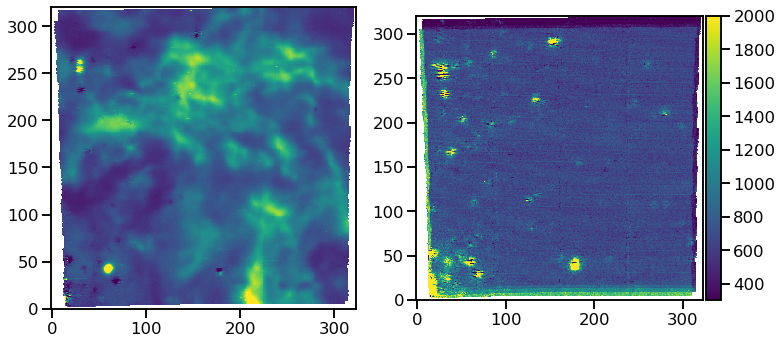

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
siii6312map.plot(ax=axes[0], vmin=0, vmax=1e4)
xx6293map.plot(ax=axes[1], colorbar="v", vmin=300, vmax=2000)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


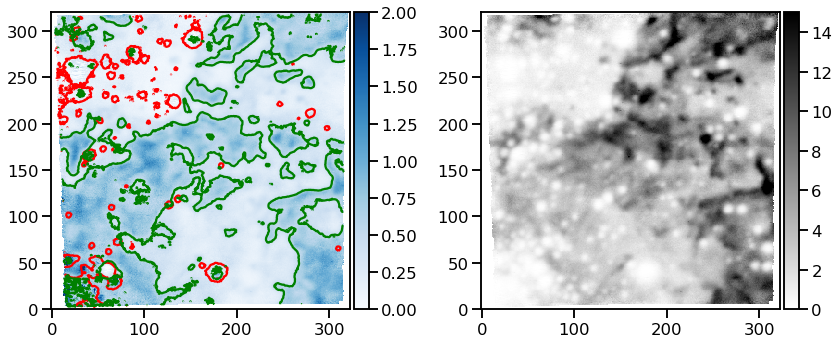

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
(oi6300map / siii6312map).plot(ax=axes[0], vmin=0, vmax=2.0, cmap="Blues", colorbar="v")
(oi6300map / cont6340).plot(ax=axes[1], vmin=0, vmax=15.0, cmap="gray_r", colorbar="v")
axes[0].contour((oi6300map / cont6340).data, levels=[0.5], colors="r")
axes[0].contour((oi6300map / siii6312map).data, levels=[0.5], colors="g")

fig.tight_layout()

In [80]:
m = ((oi6300map / cont6340).data > 0.5) & ((oi6300map / siii6312map).data > 0.5)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


In [81]:
cubeCC = cubeC.copy()
cubeCC.mask = cubeCC.mask | (~m[None, :, :])

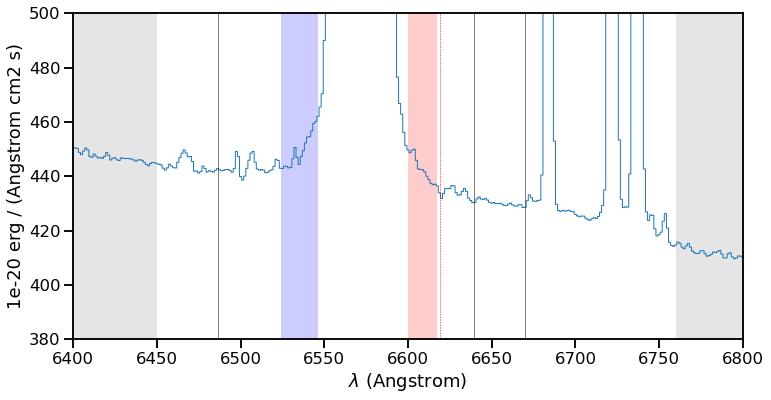

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeCC.mean(axis=(1, 2)).plot()
for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in 6196.0, 6613.5,:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed")

dopfac = (1.0 + Vsys / light_speed)
ax.axvspan(6594.2*dopfac, 6611.2*dopfac, linewidth=0, color="r", alpha=0.2)
ax.axvspan(6518.55*dopfac, 6540.65*dopfac, linewidth=0, color="b", alpha=0.2)


ax.axvspan(6400, 6450, linewidth=0, color="k", alpha=0.1)
ax.axvspan(6760, 6800, linewidth=0, color="k", alpha=0.1)



ax.set(
    xlim=[6400, 6800],
    ylim=[380, 500],
);

Select the inner Raman bands on the red and blue sides: B033 and R040.

In [126]:
cont6400 = cubeC.select_lambda(6400, 6450).mean(axis=0)
cont6800 = cubeC.select_lambda(6760, 6800).mean(axis=0)
cont6600 = 0.5 * (cont6400 + cont6800)
cont6500 = 0.5 * (cont6400 + cont6600)
raman_R040 = (cubeC.select_lambda(6594.2*dopfac, 6611.2*dopfac) - cont6600).mean(axis=0)
raman_B033 = (cubeC.select_lambda(6518.55*dopfac, 6540.65*dopfac) - cont6500).mean(axis=0)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


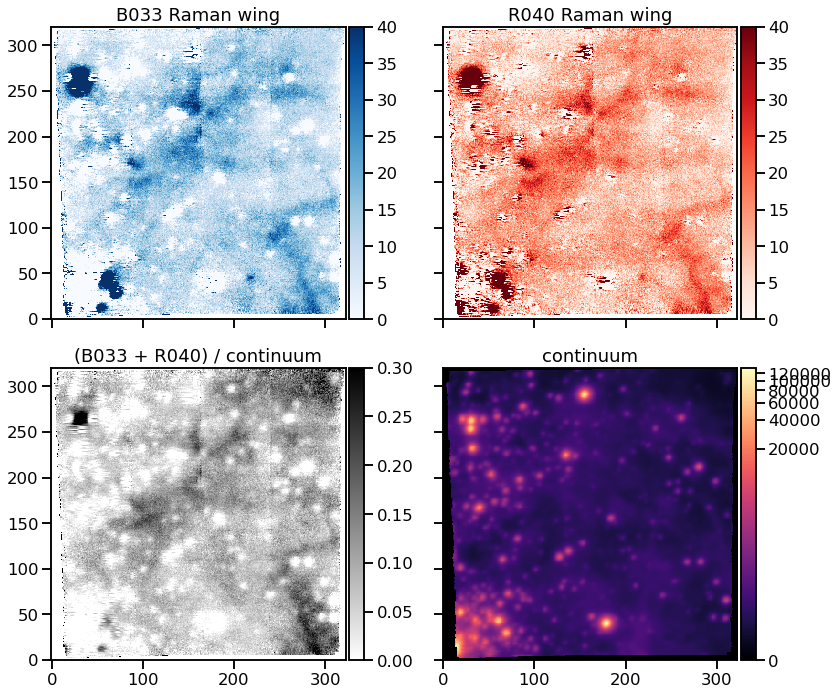

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
raman_B033.plot(ax=axes[0, 0], vmin=0, vmax=40, cmap="Blues", colorbar="v")
raman_R040.plot(ax=axes[0, 1], colorbar="v", vmin=0, vmax=40, cmap="Reds")
((raman_R040 + raman_B033) / cont6600).plot(ax=axes[1, 0], vmin=0, vmax=0.3, colorbar="v", cmap="gray_r")
cont6600.plot(ax=axes[1, 1], scale="log", colorbar="v", cmap="magma")
axes[0, 0].set_title("B033 Raman wing")
axes[0, 1].set_title("R040 Raman wing")
axes[1, 0].set_title("(B033 + R040) / continuum")
axes[1, 1].set_title("continuum")
fig.tight_layout();

The blue and red Raman wings look remarkably similar.  They trace different material than [O I], more distant from the star cluster.

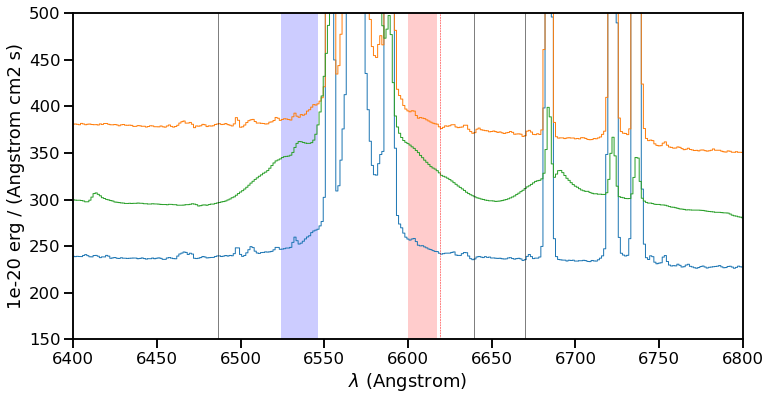

In [131]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC[:, :40, 250:].mean(axis=(1, 2)).plot()
cubeC[:, 130:180, 80:120].mean(axis=(1, 2)).plot()
(0.035*cubeC[:, 260:275, 20:40]).mean(axis=(1, 2)).plot()


for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in 6196.0, 6613.5,:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed")

ax.axvspan(6594.2*dopfac, 6611.2*dopfac, linewidth=0, color="r", alpha=0.2)
ax.axvspan(6518.55*dopfac, 6540.65*dopfac, linewidth=0, color="b", alpha=0.2)

ax.set(
    xlim=[6400, 6800],
    ylim=[150, 500],
);

This is selecting the 3 regions that have a large Raman/continuum ratio.  

The middle one is the compact source at the top-left.  It is clearly a Wolf-Rayet star and is not Raman scattering at all.  The shape of the wings is wrong, and the He I line has wings too. 

But the top and bottom one are clear Raman profiles. The O I 6633 absorption looks to be slightly blue-shifted from the systemic velocity.  Why would that be?